In [1]:
pip install nltk

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\VICTUS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
#read preprocessed data
import pandas as pd
df = pd.read_csv("C:/Users/VICTUS/Documents/STIX 3913 Project 1/Excel Data/Preprocessed Data Lemmatize.csv")

In [5]:
df['lemmatize_classify'] = None
df.loc[0:157, 'lemmatize_classify'] = 1
df.loc[158:197, 'lemmatize_classify'] = 0
df['lemmatize_classify'] = df['lemmatize_classify'].astype(int)
df

,Posts,Lemmatize,lemmatize_classify
0,Muslim and non-Muslim folks. What are your tho...,"['muslim', 'nonmuslim', 'folk', 'thought', 'su...",1
1,It takes a lot of courage to end ur own life. ...,"['take', 'lot', 'courage', 'end', 'ur', 'life'...",1
2,Those condemning the victims r bunch of low li...,"['condemning', 'victim', 'r', 'bunch', 'low', ...",1
3,"Depression is no joke. Get help, voice out, po...","['depression', 'joke', 'get', 'help', 'voice',...",1
4,Coming from an atheist with no in depth religi...,"['coming', 'atheist', 'depth', 'religious', 'k...",1
...,...,...,...
193,The al-Quran is the transcription of the revel...,"['alquran', 'transcription', 'revelation', 'al...",0
194,Don't care. The religion has caused so much br...,"['dont', 'care', 'religion', 'caused', 'much',...",0
195,"Alhamdulillah. I am okay for now. Living well,...","['alhamdulillah', 'okay', 'living', 'well', 'p...",0
196,That the onus is to disprove the existence of ...,"['onus', 'disprove', 'existence', 'divinity', ...",0


In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

df['Lemmatize'] = df['Lemmatize'].apply(lambda x: ' '.join(eval(x)))  # Convert list of words back to string

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Lemmatize'])

y = df['lemmatize_classify']
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)
# Train the Logistic Regression model
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions)) 

#file_path = "C:/Users/VICTUS/Documents/STIX 3913 Project 1/Excel Data/Preprocessed emotion.csv"
#df.to_csv(file_path, index=False)

              precision    recall  f1-score   support

           0       0.62      0.56      0.59         9
           1       0.88      0.90      0.89        31

    accuracy                           0.82        40
   macro avg       0.75      0.73      0.74        40
weighted avg       0.82      0.82      0.82        40



In [7]:
analyzer = SentimentIntensityAnalyzer()

df["Polarity"] = ""
df["Emotion"] = ""

for index, row in df.iterrows():
    text = " ".join(row["Posts"].split())  
    scores = analyzer.polarity_scores(text)
    compound_score = scores["compound"]

    if compound_score > 0.0:
        emotion = "Positive"
    else:
        emotion = "Negative"
        
    df.at[index, "Polarity"] = compound_score
    df.at[index, "Emotion"] = emotion
df    

,Posts,Lemmatize,lemmatize_classify,Polarity,Emotion
0,Muslim and non-Muslim folks. What are your tho...,muslim nonmuslim folk thought suicide,1,-0.6705,Negative
1,It takes a lot of courage to end ur own life. ...,take lot courage end ur life dont know went ca...,1,0.8995,Positive
2,Those condemning the victims r bunch of low li...,condemning victim r bunch low life,1,-0.5267,Negative
3,"Depression is no joke. Get help, voice out, po...",depression joke get help voice pour ur heart w...,1,-0.25,Negative
4,Coming from an atheist with no in depth religi...,coming atheist depth religious knowledge suici...,1,-0.9843,Negative
...,...,...,...,...,...
193,The al-Quran is the transcription of the revel...,alquran transcription revelation allah swt pro...,0,0.3701,Positive
194,Don't care. The religion has caused so much br...,dont care religion caused much brainrot,0,-0.3875,Negative
195,"Alhamdulillah. I am okay for now. Living well,...",alhamdulillah okay living well physically healthy,0,0.6908,Positive
196,That the onus is to disprove the existence of ...,onus disprove existence divinity heaven hell a...,0,0.2315,Positive


<Axes: xlabel='Emotion'>

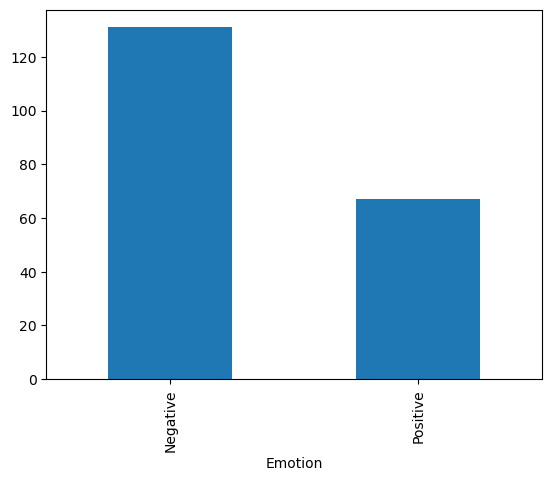

In [8]:
import matplotlib.pyplot as plt

df.groupby(["Emotion"]).size().plot(kind="bar")

In [9]:
#read combined data = sentiment(polarity, emotion) + LIWC data
df2 = pd.read_csv("C:/Users/VICTUS/Documents/STIX 3913 Project 1/Excel Data/Combined data.csv")

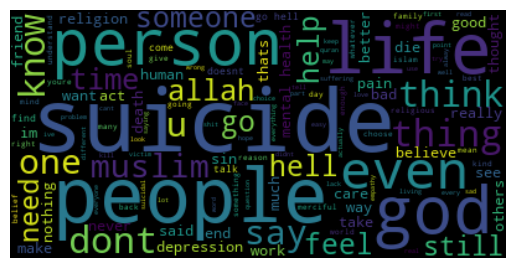

In [10]:
from wordcloud import WordCloud

df3 = pd.read_csv("C:/Users/VICTUS/Documents/STIX 3913 Project 1/Excel Data/Combined data.csv", usecols=['Lemmatize'])
text = ' '.join(df['Lemmatize'].astype(str))
wordcloud = WordCloud(max_font_size=70).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
column_name = 'Emotion'

#count occurrences of each value in the column
value_counts = df2[column_name].value_counts()

total_entries = len(df)

for value, count in value_counts.items():
    percentage = (count / total_entries) * 100
    print(f"{value}={count} ({percentage:.2f}%)")

Negative=131 (66.16%)
Positive=67 (33.84%)


In [12]:
def classify(value):
    return 'Mental' if value > 0 else 'Non Mental'

df2['Classification'] = df2['mental'].apply(classify)
df2.head()

,Posts,Lemmatize,Segment,tone_pos,tone_neg,emotion,emo_pos,emo_neg,mental,Polarity,Emotion,Classification
0,Muslim and non-Muslim folks. What are your tho...,"['muslim', 'nonmuslim', 'folk', 'thought', 'su...",1,0.00,0.00,0.00,0.00,0.00,20.00,-0.6705,Negative,Mental
1,It takes a lot of courage to end ur own life. ...,"['take', 'lot', 'courage', 'end', 'ur', 'life'...",1,26.32,0.00,15.79,15.79,0.00,0.00,0.8995,Positive,Non Mental
2,Those condemning the victims r bunch of low li...,"['condemning', 'victim', 'r', 'bunch', 'low', ...",1,0.00,16.67,0.00,0.00,0.00,0.00,-0.5267,Negative,Non Mental
3,"Depression is no joke. Get help, voice out, po...","['depression', 'joke', 'get', 'help', 'voice',...",1,15.38,7.69,7.69,0.00,7.69,7.69,-0.2500,Negative,Mental
4,Coming from an atheist with no in depth religi...,"['coming', 'atheist', 'depth', 'religious', 'k...",1,0.00,20.00,0.00,0.00,0.00,5.00,-0.9843,Negative,Mental


In [13]:
df2['Emotion_Binary'] = df2['Emotion'].map({'Positive': 0, 'Negative': 1})
df2['Classification_Binary'] = df2['Classification'].map({'Mental': 1, 'Non Mental': 0})

def calculate_jaccard(row):
    # Jaccard index is 1 if both are 0 or both are 1
    if row['Emotion_Binary'] == row['Classification_Binary']:
        return 1
    # Jaccard index is 0 if one is 0 and the other is 1
    else:
        return 0

df2['Jaccard_Index'] = df2.apply(calculate_jaccard, axis=1)
df2.head()

,Posts,Lemmatize,Segment,tone_pos,tone_neg,emotion,emo_pos,emo_neg,mental,Polarity,Emotion,Classification,Emotion_Binary,Classification_Binary,Jaccard_Index
0,Muslim and non-Muslim folks. What are your tho...,"['muslim', 'nonmuslim', 'folk', 'thought', 'su...",1,0.00,0.00,0.00,0.00,0.00,20.00,-0.6705,Negative,Mental,1,1,1
1,It takes a lot of courage to end ur own life. ...,"['take', 'lot', 'courage', 'end', 'ur', 'life'...",1,26.32,0.00,15.79,15.79,0.00,0.00,0.8995,Positive,Non Mental,0,0,1
2,Those condemning the victims r bunch of low li...,"['condemning', 'victim', 'r', 'bunch', 'low', ...",1,0.00,16.67,0.00,0.00,0.00,0.00,-0.5267,Negative,Non Mental,1,0,0
3,"Depression is no joke. Get help, voice out, po...","['depression', 'joke', 'get', 'help', 'voice',...",1,15.38,7.69,7.69,0.00,7.69,7.69,-0.2500,Negative,Mental,1,1,1
4,Coming from an atheist with no in depth religi...,"['coming', 'atheist', 'depth', 'religious', 'k...",1,0.00,20.00,0.00,0.00,0.00,5.00,-0.9843,Negative,Mental,1,1,1


In [14]:
# Filter rows with Jaccard index equal to 1
jaccard_1_count = df2[df2['Jaccard_Index'] == 1].shape[0]

# Filter rows with Jaccard index equal to 0
jaccard_0_count = df2[df2['Jaccard_Index'] == 0].shape[0]

# Calculate total count
total_count = jaccard_1_count + jaccard_0_count

# Calculate percentages
jaccard_1_percentage = (jaccard_1_count / total_count) * 100
jaccard_0_percentage = (jaccard_0_count / total_count) * 100

# Print the results
print(f"Total Jaccard index 1 count: {jaccard_1_count} ({jaccard_1_percentage:.2f}%)")
print(f"Total Jaccard index 0 count: {jaccard_0_count} ({jaccard_0_percentage:.2f}%)")

Total Jaccard index 1 count: 130 (65.66%)
Total Jaccard index 0 count: 68 (34.34%)


In [15]:
df2['tone_binary'] = df2.apply(lambda row: 1 if row['tone_neg'] > row['tone_pos'] else 0 if row['tone_neg'] < row['tone_pos'] else 0, axis=1)
df2.head()

,Posts,Lemmatize,Segment,tone_pos,tone_neg,emotion,emo_pos,emo_neg,mental,Polarity,Emotion,Classification,Emotion_Binary,Classification_Binary,Jaccard_Index,tone_binary
0,Muslim and non-Muslim folks. What are your tho...,"['muslim', 'nonmuslim', 'folk', 'thought', 'su...",1,0.00,0.00,0.00,0.00,0.00,20.00,-0.6705,Negative,Mental,1,1,1,0
1,It takes a lot of courage to end ur own life. ...,"['take', 'lot', 'courage', 'end', 'ur', 'life'...",1,26.32,0.00,15.79,15.79,0.00,0.00,0.8995,Positive,Non Mental,0,0,1,0
2,Those condemning the victims r bunch of low li...,"['condemning', 'victim', 'r', 'bunch', 'low', ...",1,0.00,16.67,0.00,0.00,0.00,0.00,-0.5267,Negative,Non Mental,1,0,0,1
3,"Depression is no joke. Get help, voice out, po...","['depression', 'joke', 'get', 'help', 'voice',...",1,15.38,7.69,7.69,0.00,7.69,7.69,-0.2500,Negative,Mental,1,1,1,0
4,Coming from an atheist with no in depth religi...,"['coming', 'atheist', 'depth', 'religious', 'k...",1,0.00,20.00,0.00,0.00,0.00,5.00,-0.9843,Negative,Mental,1,1,1,1


In [16]:
df2.drop(['Posts','Lemmatize','Emotion','Classification'],axis=1,inplace=True)

In [17]:
#tone
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2.drop('tone_binary',axis=1),
                                                    df2['tone_binary'],
                                                    test_size=0.20, random_state=101)

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
logmodel.score(X_test,y_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.92      0.96        12

    accuracy                           0.97        40
   macro avg       0.98      0.96      0.97        40
weighted avg       0.98      0.97      0.97        40



In [18]:
#sentiment
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2.drop('Emotion_Binary',axis=1),
                                                    df2['Emotion_Binary'],
                                                    test_size=0.20, random_state=101)

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
logmodel.score(X_test,y_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.93      1.00      0.97        28

    accuracy                           0.95        40
   macro avg       0.97      0.92      0.94        40
weighted avg       0.95      0.95      0.95        40



In [19]:
#LIWC feature
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2.drop('Classification_Binary',axis=1),
                                                    df2['Classification_Binary'],
                                                    test_size=0.20, random_state=101)

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
logmodel.score(X_test,y_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      0.90      0.95        21

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40

